#  <span style="color:red">Data Cleaning and preprocessing </span>


## first we import the data

In [1]:
import pandas as pd
import numpy as np
responses = pd.read_csv('Questionnaire_responses.csv')

## Make an ID-only dataset 

In [2]:
# extract student IDs
responses.rename(columns = {'please, put the last 6 number of your id \nFor random prize drawing':'Student_ID'}, inplace = True)
IDs = responses["Student_ID"]
IDs = [x.strip() for x in IDs if str(x) != "nan" and len(str(x)) < 11 and str(x) != "."]
responses = responses.drop(["Student_ID"], axis=1)
len(IDs)

195

## clean time_submitted column

In [3]:
responses.rename(columns = {'طابع زمني':'Time_submitted'}, inplace = True)
time = [x.split(" ") for x in responses['Time_submitted']]

timestamps = []
for i in range(len(time)):
    if time[i][-2] == "م":
        time[i][-2] = "PM"
    elif time[i][-2] == "ص":
        time[i][-2] = "AM"
        
timestamps = [x[0] + " " + x[1] + " " + x[2] for x in time]

responses["Time_submitted"] = timestamps
responses

,Time_submitted,What is your age?,What is your level?,What is your gender?,Which of the following fields are you interested in?,"Based on your interested field, which programming language helps you the most?","In terms of job opportunities and career growth, which programming language do you think is most in demand?",Do you prefer to choose a language you are already familiar with for your tasks?,How familiar are you with each language? [Python],How familiar are you with each language? [R],...,Python :,R :,Java :,How easy do you find the learning process for each language? [Python],How easy do you find the learning process for each language? [R],How easy do you find the learning process for each language? [Java],Which programming language do you think has the best community support and resources available?,Python :.1,R :,Java :
0,2023/04/27 3:25:12 PM,21,3,Male,Data science;Web Development,Python,Python,Yes,5,3,...,Data analysis and visualization,Statistical analysis,Object-oriented programming,5,3,2,Python,Python.org;Coursera,YouTube,Online communities;Oracle
1,2023/04/27 3:28:09 PM,20,2,Female,AI;Data science,Python,Python,Yes,5,4,...,Machine learning and artificial intelligence,Statistical analysis,Creating graphical user interfaces (GUIs),5,4,3,Python,Codecademy;Coursera,Coursera;Online communities,Udemy;Oracle;Coursera
2,2023/04/27 3:28:58 PM,21,2,Female,AI;Data science;Web Development,Python,Python,Yes,5,3,...,Machine learning and artificial intelligence,Statistical analysis,Object-oriented programming,5,4,5,Java,Coursera,YouTube,Online communities
3,2023/04/27 3:30:10 PM,19,2,Male,Data science;Web Development,Python,Python,Yes,4,2,...,Data analysis and visualization,Statistical analysis,Mobile development,4,2,3,Python,Coursera;YouTube,YouTube;Online communities,Udemy;YouTube
4,2023/04/27 3:31:55 PM,20,2,Male,Mobile Applications;AI;Data science,Python,Python,Yes,4,2,...,Machine learning and artificial intelligence,Data analysis and visualization,Object-oriented programming,4,2,5,Python,edX;Python.org;Coursera,YouTube;Online communities,Online communities;Oracle;Coursera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2023/05/06 3:34:59 PM,20,2,Female,Mobile Applications;AI;Data science;Web Develo...,Python,Python,Yes,4,4,...,Data analysis and visualization,Statistical analysis,Object-oriented programming,3,3,2,Python,University,YouTube;University,Udemy;University
248,2023/05/06 4:30:52 PM,19,2,Female,Mobile Applications;AI;Data science,Python,Python,Yes,4,3,...,Machine learning and artificial intelligence,Statistical analysis,Mobile development,3,3,2,Python,YouTube,YouTube;Online communities,Online communities;YouTube
249,2023/05/06 4:45:50 PM,20,2,Female,Mobile Applications;Cyber Security;AI,Java,Python,Sometimes,3,2,...,Machine learning and artificial intelligence,Statistical analysis,Mobile development,4,3,5,Java,Python.org;Youtube,YouTube,Online communities;Oracle
250,2023/05/06 7:17:08 PM,19,2,Female,Mobile Applications;Cyber Security;AI;Data sci...,Python,Python,Yes,4,4,...,Machine learning and artificial intelligence,Statistical analysis,Object-oriented programming,5,4,3,Python,edX,YouTube,Online communities


### Columns names

In [4]:
cols_name = responses.columns
cols_name = [x.strip() for x in cols_name]

cols_name

['Time_submitted',
 'What is your age?',
 'What is your level?',
 'What is your gender?',
 'Which of the following fields are you interested in?',
 'Based on your interested field, which programming language helps you the most?',
 'In terms of job opportunities and career growth, which programming language do you think is most in demand?',
 'Do you prefer to choose a language you are already familiar with for your tasks?',
 'How familiar are you with each language? [Python]',
 'How familiar are you with each language? [R]',
 'How familiar are you with each language? [Java]',
 'In your opinion, how important is it to know multiple programming languages for use in data science?',
 'Which programming language do you prefer for data science projects?',
 'Do you consider the current trends in industry and job markets when choosing a language for tasks?',
 'If you agree the pervious question, can you determine why?',
 'Which programming language(s) do you think are trend in the job market to

## Here we renamed the columns to better and clearer names

In [5]:
responses.columns = cols_name

responses.rename(columns = {'What is your age?':'Student_age'}, inplace = True)
responses.rename(columns = {'What is your level?':'Student_level'}, inplace = True)
responses.rename(columns = {'What is your gender?':'Student_gender'}, inplace = True)
responses.rename(columns = {'How familiar are you with each language? [Python]':'Familiarity_with_Python'}, inplace = True)
responses.rename(columns = {'How familiar are you with each language? [Java]':'Familiarity_with_Java'}, inplace = True)
responses.rename(columns = {'How familiar are you with each language? [R]':'Familiarity_with_R'}, inplace = True)
responses.rename(columns = {'Which language are you more proficient in?':'Most_language_proficient_in'}, inplace = True)
responses.rename(columns = {'How easy do you find the learning process for each language? [Python]':'How_easy_learning_Python'}, inplace = True)
responses.rename(columns = {'How easy do you find the learning process for each language? [Java]':'How_easy_learning_Java'}, inplace = True)
responses.rename(columns = {'How easy do you find the learning process for each language? [R]':'How_easy_learning_R'}, inplace = True)
responses.rename(columns = {'Which programming language do you think has the best community support and resources available?':'Best_community_support_and_resources'}, inplace = True)      
responses.rename(columns = {'Based on your interested field, which programming language helps you the most?':'Helps_the_most'}, inplace = True)      
responses.rename(columns = {'Which programming language(s) do you think are trend in the job market towards hiring professionals with skills?':'Trend_languages'}, inplace = True)      
responses.rename(columns = {'Which of the following fields are you interested in?':'Fields_interested_in'}, inplace = True)      
responses.rename(columns = {'In your opinion, how important is it to know multiple programming languages for use in data science?':'Importance_degree_of_knowing_multiple_languages'}, inplace = True)      
responses.rename(columns = {'Can you identify the last task you worked on?':'Last_task_worked_on'}, inplace = True)      
responses.rename(columns = {'Which language did you use in this task? and why?':'Language_used_and_why'}, inplace = True)      
responses.rename(columns = {'Which programming language do you prefer for data science projects?':'Preferred_language_for_projects'}, inplace = True)      
responses.rename(columns = {'In terms of job opportunities and career growth, which programming language do you think is most in demand?':'High_in_demand_language'}, inplace = True)      
responses.rename(columns = {'Do you prefer to choose a language you are already familiar with for your tasks?':'Prefer_to_use_familiar_language'}, inplace = True)      
responses.rename(columns = {'Do you consider the current trends in industry and job markets when choosing a language for tasks?':'Consider_trends_when_choosing_a_language'}, inplace = True)     
responses.rename(columns = {'Do you consider the specific requirements of your project when choosing a language for tasks?':'Consider_requirements_when_choosing_a_language'}, inplace = True)      
responses.rename(columns = {'How much do the features of the programming language influence your decision to use it for a project?':'Do_language_features_influence_you'}, inplace = True)      
responses.rename(columns = {'If you agree the pervious question, can you determine why?':'If_yes_then_why?'}, inplace = True)      

Java = responses["Java :"]
Java.columns = ["Java_usage", "Java_learning_resources"]
R = responses["R :"]
R.columns = ["R_usage", "R_learning_resources"]

responses = pd.concat([responses, Java[Java.columns[0]], Java[Java.columns[1]], R[R.columns[0]], R[R.columns[1]]], axis=1)
responses = responses.drop(["R :", "Java :"], axis=1)

responses.rename(columns = {'Python :.1':'Python_learning_resources'}, inplace = True)      
responses.rename(columns = {'Python :':'Python_usage'}, inplace = True)      

cols = responses.columns.tolist()
tmp = cols[-6]
cols[-6] = cols[-10]
cols[-10] = tmp

responses = responses[cols]

cols

['Time_submitted',
 'Student_age',
 'Student_level',
 'Student_gender',
 'Fields_interested_in',
 'Helps_the_most',
 'High_in_demand_language',
 'Prefer_to_use_familiar_language',
 'Familiarity_with_Python',
 'Familiarity_with_R',
 'Familiarity_with_Java',
 'Importance_degree_of_knowing_multiple_languages',
 'Preferred_language_for_projects',
 'Consider_trends_when_choosing_a_language',
 'If_yes_then_why?',
 'Trend_languages',
 'Most_language_proficient_in',
 'Consider_requirements_when_choosing_a_language',
 'Last_task_worked_on',
 'Language_used_and_why',
 'Do_language_features_influence_you',
 'Best_community_support_and_resources',
 'How_easy_learning_Python',
 'How_easy_learning_R',
 'How_easy_learning_Java',
 'Python_usage',
 'Python_learning_resources',
 'Java_usage',
 'Java_learning_resources',
 'R_usage',
 'R_learning_resources']

In [6]:
responses

,Time_submitted,Student_age,Student_level,Student_gender,Fields_interested_in,Helps_the_most,High_in_demand_language,Prefer_to_use_familiar_language,Familiarity_with_Python,Familiarity_with_R,...,Best_community_support_and_resources,How_easy_learning_Python,How_easy_learning_R,How_easy_learning_Java,Python_usage,Python_learning_resources,Java_usage,Java_learning_resources,R_usage,R_learning_resources
0,2023/04/27 3:25:12 PM,21,3,Male,Data science;Web Development,Python,Python,Yes,5,3,...,Python,5,3,2,Data analysis and visualization,Python.org;Coursera,Object-oriented programming,Online communities;Oracle,Statistical analysis,YouTube
1,2023/04/27 3:28:09 PM,20,2,Female,AI;Data science,Python,Python,Yes,5,4,...,Python,5,4,3,Machine learning and artificial intelligence,Codecademy;Coursera,Creating graphical user interfaces (GUIs),Udemy;Oracle;Coursera,Statistical analysis,Coursera;Online communities
2,2023/04/27 3:28:58 PM,21,2,Female,AI;Data science;Web Development,Python,Python,Yes,5,3,...,Java,5,4,5,Machine learning and artificial intelligence,Coursera,Object-oriented programming,Online communities,Statistical analysis,YouTube
3,2023/04/27 3:30:10 PM,19,2,Male,Data science;Web Development,Python,Python,Yes,4,2,...,Python,4,2,3,Data analysis and visualization,Coursera;YouTube,Mobile development,Udemy;YouTube,Statistical analysis,YouTube;Online communities
4,2023/04/27 3:31:55 PM,20,2,Male,Mobile Applications;AI;Data science,Python,Python,Yes,4,2,...,Python,4,2,5,Machine learning and artificial intelligence,edX;Python.org;Coursera,Object-oriented programming,Online communities;Oracle;Coursera,Data analysis and visualization,YouTube;Online communities
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2023/05/06 3:34:59 PM,20,2,Female,Mobile Applications;AI;Data science;Web Develo...,Python,Python,Yes,4,4,...,Python,3,3,2,Data analysis and visualization,University,Object-oriented programming,Udemy;University,Statistical analysis,YouTube;University
248,2023/05/06 4:30:52 PM,19,2,Female,Mobile Applications;AI;Data science,Python,Python,Yes,4,3,...,Python,3,3,2,Machine learning and artificial intelligence,YouTube,Mobile development,Online communities;YouTube,Statistical analysis,YouTube;Online communities
249,2023/05/06 4:45:50 PM,20,2,Female,Mobile Applications;Cyber Security;AI,Java,Python,Sometimes,3,2,...,Java,4,3,5,Machine learning and artificial intelligence,Python.org;Youtube,Mobile development,Online communities;Oracle,Statistical analysis,YouTube
250,2023/05/06 7:17:08 PM,19,2,Female,Mobile Applications;Cyber Security;AI;Data sci...,Python,Python,Yes,4,4,...,Python,5,4,3,Machine learning and artificial intelligence,edX,Object-oriented programming,Online communities,Statistical analysis,YouTube



## Here we make a new column with a number of submitted, we will need this column later to merge our data with the edited data after transformation

In [7]:
new_col_values = list(range(1, len(responses)+1))

responses["number"] = new_col_values

responses.head()


,Time_submitted,Student_age,Student_level,Student_gender,Fields_interested_in,Helps_the_most,High_in_demand_language,Prefer_to_use_familiar_language,Familiarity_with_Python,Familiarity_with_R,...,How_easy_learning_Python,How_easy_learning_R,How_easy_learning_Java,Python_usage,Python_learning_resources,Java_usage,Java_learning_resources,R_usage,R_learning_resources,number
0,2023/04/27 3:25:12 PM,21,3,Male,Data science;Web Development,Python,Python,Yes,5,3,...,5,3,2,Data analysis and visualization,Python.org;Coursera,Object-oriented programming,Online communities;Oracle,Statistical analysis,YouTube,1
1,2023/04/27 3:28:09 PM,20,2,Female,AI;Data science,Python,Python,Yes,5,4,...,5,4,3,Machine learning and artificial intelligence,Codecademy;Coursera,Creating graphical user interfaces (GUIs),Udemy;Oracle;Coursera,Statistical analysis,Coursera;Online communities,2
2,2023/04/27 3:28:58 PM,21,2,Female,AI;Data science;Web Development,Python,Python,Yes,5,3,...,5,4,5,Machine learning and artificial intelligence,Coursera,Object-oriented programming,Online communities,Statistical analysis,YouTube,3
3,2023/04/27 3:30:10 PM,19,2,Male,Data science;Web Development,Python,Python,Yes,4,2,...,4,2,3,Data analysis and visualization,Coursera;YouTube,Mobile development,Udemy;YouTube,Statistical analysis,YouTube;Online communities,4
4,2023/04/27 3:31:55 PM,20,2,Male,Mobile Applications;AI;Data science,Python,Python,Yes,4,2,...,4,2,5,Machine learning and artificial intelligence,edX;Python.org;Coursera,Object-oriented programming,Online communities;Oracle;Coursera,Data analysis and visualization,YouTube;Online communities,5


## Here we download open-ended answers to transform them into a better format 

### Seperate the open-ended answers 

In [8]:
Last_task_worked_on_answers = responses.loc[responses["Last_task_worked_on"].notnull(), ["number", "Last_task_worked_on"]]
Language_used_and_why_answers  = responses.loc[responses["Language_used_and_why"].notnull(), ["number", "Language_used_and_why"]]

In [9]:
Fields_interested_in_uniuque = responses.loc[~responses["Fields_interested_in"].duplicated(keep=False), ["number", "Fields_interested_in"]]
Helps_the_most_uniuque = responses.loc[~responses["Helps_the_most"].duplicated(keep=False), ["number", "Helps_the_most"]]
High_in_demand_language_uniuque = responses.loc[~responses["High_in_demand_language"].duplicated(keep=False), ["number", "High_in_demand_language"]]
If_yes_then_why_uniuque = responses.loc[~responses["If_yes_then_why?"].duplicated(keep=False), ["number", "If_yes_then_why?"]]
Trend_languages_uniuque = responses.loc[~responses["Trend_languages"].duplicated(keep=False), ["number", "Trend_languages"]]
Python_usage_uniuque = responses.loc[~responses["Python_usage"].duplicated(keep=False), ["number", "Python_usage"]]
Python_learning_resources_uniuque = responses.loc[~responses["Python_learning_resources"].duplicated(keep=False), ["number", "Python_learning_resources"]]
Java_usage_uniuque = responses.loc[~responses["Java_usage"].duplicated(keep=False), ["number", "Java_usage"]]
Java_learning_resources_uniuque = responses.loc[~responses["Java_learning_resources"].duplicated(keep=False), ["number", "Java_learning_resources"]]
R_usage_uniuque = responses.loc[~responses["R_usage"].duplicated(keep=False), ["number", "R_usage"]]
R_learning_resources_uniuque = responses.loc[~responses["R_learning_resources"].duplicated(keep=False), ["number", "R_learning_resources"]]

### Download them

In [10]:
Last_task_worked_on_answers.to_csv('Last_task_worked_on_answers.csv', index=False)

Language_used_and_why_answers.to_csv('Language_used_and_why_answers.csv', index=False)

Fields_interested_in_uniuque.to_csv('Fields_interested_in_uniuque.csv', index=False)

Helps_the_most_uniuque.to_csv('Helps_the_most_uniuque.csv', index=False)

High_in_demand_language_uniuque.to_csv('High_in_demand_language_uniuque.csv', index=False)

If_yes_then_why_uniuque.to_csv('If_yes_then_why_uniuque.csv', index=False)

Trend_languages_uniuque.to_csv('Trend_languages_uniuque.csv', index=False)

Python_usage_uniuque.to_csv('Python_usage_uniuque.csv', index=False)

Python_learning_resources_uniuque.to_csv('Python_learning_resources_uniuque.csv', index=False)

Java_usage_uniuque.to_csv('Java_usage_uniuque.csv', index=False)

Java_learning_resources_uniuque.to_csv('Java_learning_resources_uniuque.csv', index=False)

R_usage_uniuque.to_csv('R_usage_uniuque.csv', index=False)

R_learning_resources_uniuque.to_csv('R_learning_resources_uniuque.csv', index=False)


## We did a manual transformation and used some Ai tools too, to transform and categorize the open-ended answers

### The latest form of the data

In [11]:
response_dataset_final = pd.read_csv('response_dataset.csv')


In [12]:
response_dataset_final

,Time_submitted,Student_age,Student_level,Student_gender,Fields_interested_in,Helps_the_most,High_in_demand_language,Prefer_to_use_familiar_language,Familiarity_with_Python,Familiarity_with_R,...,Best_community_support_and_resources,How_easy_learning_Python,How_easy_learning_R,How_easy_learning_Java,Python_usage,Python_learning_resources,Java_usage,Java_learning_resources,R_usage,R_learning_resources
0,4/27/2023 15:25,21,3,Male,Data science;Web Development,Python,Python,Yes,5,3,...,Python,5,3,2,Data analysis and visualization,Python.org;Coursera,OOP,Online communities;Oracle,Statistical analysis,YouTube
1,4/27/2023 15:28,20,2,Female,AI;Data science,Python,Python,Yes,5,4,...,Python,5,4,3,Machine learning and artificial intelligence,Codecademy;Coursera,GUIs,Udemy;Oracle;Coursera,Statistical analysis,Coursera;Online communities
2,4/27/2023 15:28,21,2,Female,AI;Data science;Web Development,Python,Python,Yes,5,3,...,Java,5,4,5,Machine learning and artificial intelligence,Coursera,OOP,Online communities,Statistical analysis,YouTube
3,4/27/2023 15:30,19,2,Male,Data science;Web Development,Python,Python,Yes,4,2,...,Python,4,2,3,Data analysis and visualization,Coursera;YouTube,Mobile development,Udemy;YouTube,Statistical analysis,YouTube;Online communities
4,4/27/2023 15:31,20,2,Male,Mobile Applications;AI;Data science,Python,Python,Yes,4,2,...,Python,4,2,5,Machine learning and artificial intelligence,edX;Python.org;Coursera,OOP,Online communities;Oracle;Coursera,Data analysis and visualization,YouTube;Online communities
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,5/6/2023 15:34,20,2,Female,Mobile Applications;AI;Data science;Web Develo...,Python,Python,Yes,4,4,...,Python,3,3,2,Data analysis and visualization,College,OOP,Udemy;College,Statistical analysis,YouTube;College
248,5/6/2023 16:30,19,2,Female,Mobile Applications;AI;Data science,Python,Python,Yes,4,3,...,Python,3,3,2,Machine learning and artificial intelligence,YouTube,Mobile development,Online communities;YouTube,Statistical analysis,YouTube;Online communities
249,5/6/2023 16:45,20,2,Female,Mobile Applications;Cyber Security;AI,Java,Python,Sometimes,3,2,...,Java,4,3,5,Machine learning and artificial intelligence,Python.org;YouTube,Mobile development,Online communities;Oracle,Statistical analysis,YouTube
250,5/6/2023 19:17,19,2,Female,Mobile Applications;Cyber Security;AI;Data sci...,Python,Python,Yes,4,4,...,Python,5,4,3,Machine learning and artificial intelligence,edX,OOP,Online communities,Statistical analysis,YouTube


### Name of columns 

In [13]:
columns_list_final = response_dataset_final.columns.to_list()
print("Columns:")
for col in columns_list_final:
    print(col)

Columns:
Time_submitted
Student_age
Student_level
Student_gender
Fields_interested_in
Helps_the_most
High_in_demand_language
Prefer_to_use_familiar_language
Familiarity_with_Python
Familiarity_with_R
Familiarity_with_Java
Importance_degree_of_knowing_multiple_languages
Preferred_language_for_projects
Consider_trends_when_choosing_a_language
If_yes_then_why?
Trend_languages
Most_language_proficient_in
Consider_requirements_when_choosing_a_language
Last_task_worked_on
Category_of_last_task_worked_on
Language_used
and_why
Do_language_features_influence_you
Best_community_support_and_resources
How_easy_learning_Python
How_easy_learning_R
How_easy_learning_Java
Python_usage
Python_learning_resources
Java_usage
Java_learning_resources
R_usage
R_learning_resources


In [14]:
Student_level_counts = response_dataset_final['Student_level'].value_counts()
print(Student_level_counts)

2    144
1     51
3     32
4     25
Name: Student_level, dtype: int64


## To detect the careless responses we need to find a relationship between some questions example:- if the question 1's answer is A then the question's 2 answer should be B

## We will try to do it in some questions we think that they are related but we will test first if there's a relation between them or not


## our questions will be Most_language_proficient_in with these three (Familiarity_with_Python, Familiarity_with_R, Familiarity_with_Java)


###  <span style="color:red">We believe that people who are most proficient in python should have a high familiraty with python and people who are most proficient in java should have a high familiraty with java </span>



##  <span style="color:blue">we will use Kruskal-Wallis and Tukey's post hoc to test that   </span>


##  <span style="color:red">Our hypotheses(in kruskal-wallis test) are </span>

### Null Hypothesis -> there is no significant difference in the mean familiarity with (Python-Java-R) among the groups of Most_language_proficient_in.
### Alternative hypothesis -> there is a significant difference in the mean familiarity with (Python-Java-R) among the groups of Most_language_proficient_in.

##  <span style="color:red">Kruskal-Wallis </span>


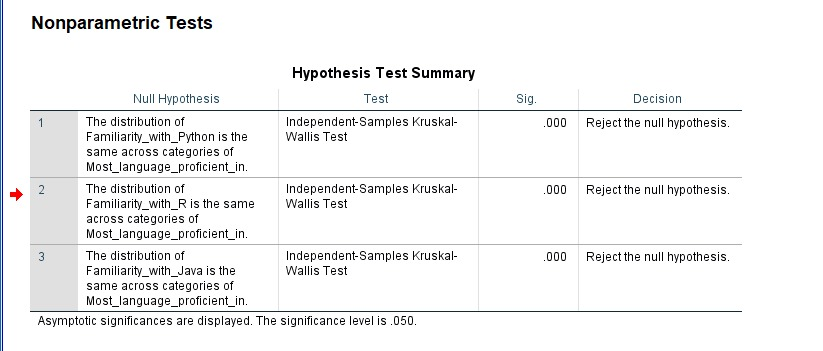

### P is smaller than your significance level ".05" so reject the null hypothesis


### And because the P is very small we have an evidence that the people who are most proficient in Python, Java, and R have different levels of familiarity with (Python-R-Java) 

### perform Dunn's test to determine which groups are significantly different

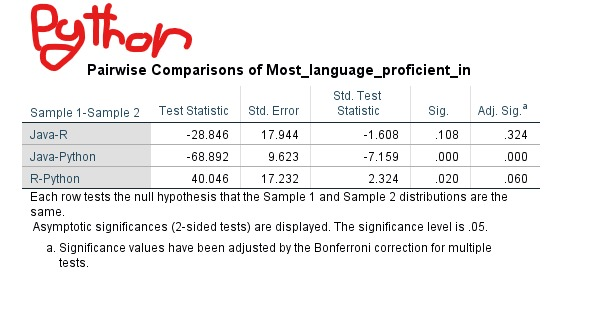

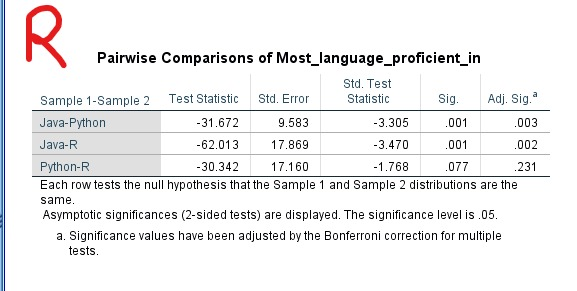

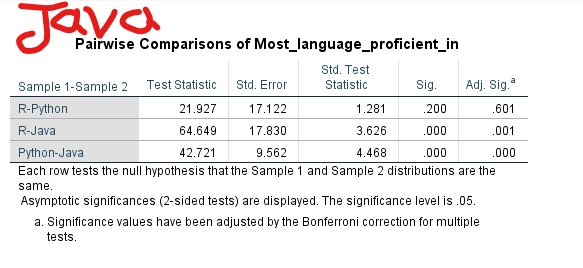

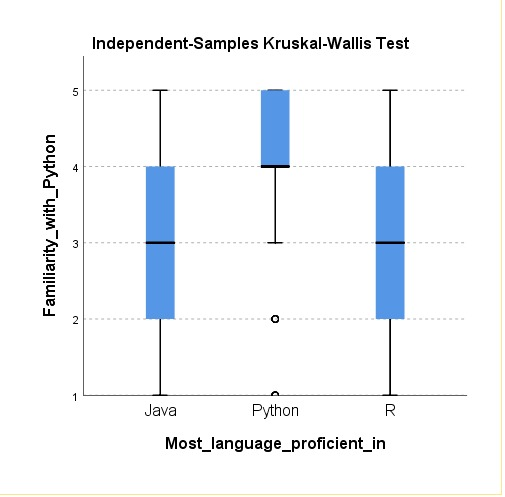

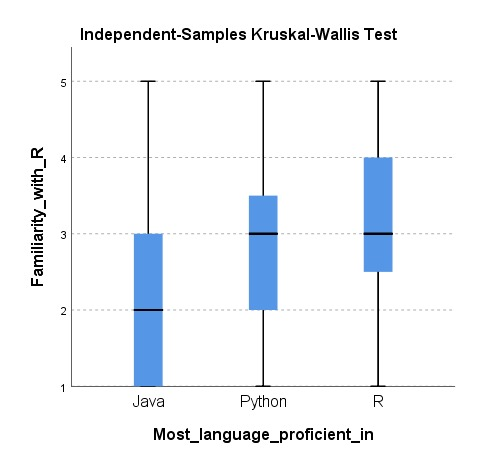

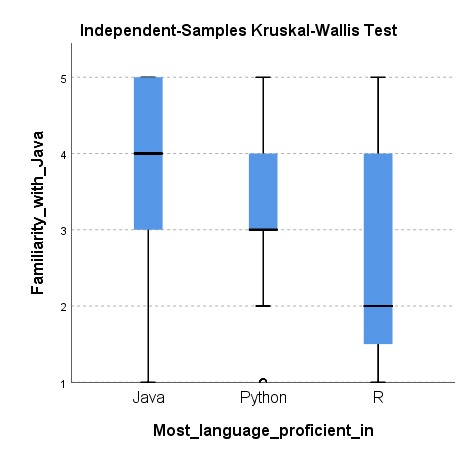


#  <span style="color:red"> we can infer these rules from that</span>.


### people who are proficient with Python are likely to be familiar with Python more or equal (java/r) and if not, there's a high chance there responses to be careless
### people who are proficient with java are likely to be familiar with java more or equal (python/r) and if not, there's a high chance their responses to be careless
### Note: not the same goes for R (because we didn't reject the null hypothesis in the pair python-R)

## Here we add a new column has 0 values, so we can use it later to know careless responses

In [15]:
response_dataset_new =response_dataset_final.copy()
response_dataset_new["mis"] = 0
response_dataset_new

,Time_submitted,Student_age,Student_level,Student_gender,Fields_interested_in,Helps_the_most,High_in_demand_language,Prefer_to_use_familiar_language,Familiarity_with_Python,Familiarity_with_R,...,How_easy_learning_Python,How_easy_learning_R,How_easy_learning_Java,Python_usage,Python_learning_resources,Java_usage,Java_learning_resources,R_usage,R_learning_resources,mis
0,4/27/2023 15:25,21,3,Male,Data science;Web Development,Python,Python,Yes,5,3,...,5,3,2,Data analysis and visualization,Python.org;Coursera,OOP,Online communities;Oracle,Statistical analysis,YouTube,0
1,4/27/2023 15:28,20,2,Female,AI;Data science,Python,Python,Yes,5,4,...,5,4,3,Machine learning and artificial intelligence,Codecademy;Coursera,GUIs,Udemy;Oracle;Coursera,Statistical analysis,Coursera;Online communities,0
2,4/27/2023 15:28,21,2,Female,AI;Data science;Web Development,Python,Python,Yes,5,3,...,5,4,5,Machine learning and artificial intelligence,Coursera,OOP,Online communities,Statistical analysis,YouTube,0
3,4/27/2023 15:30,19,2,Male,Data science;Web Development,Python,Python,Yes,4,2,...,4,2,3,Data analysis and visualization,Coursera;YouTube,Mobile development,Udemy;YouTube,Statistical analysis,YouTube;Online communities,0
4,4/27/2023 15:31,20,2,Male,Mobile Applications;AI;Data science,Python,Python,Yes,4,2,...,4,2,5,Machine learning and artificial intelligence,edX;Python.org;Coursera,OOP,Online communities;Oracle;Coursera,Data analysis and visualization,YouTube;Online communities,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,5/6/2023 15:34,20,2,Female,Mobile Applications;AI;Data science;Web Develo...,Python,Python,Yes,4,4,...,3,3,2,Data analysis and visualization,College,OOP,Udemy;College,Statistical analysis,YouTube;College,0
248,5/6/2023 16:30,19,2,Female,Mobile Applications;AI;Data science,Python,Python,Yes,4,3,...,3,3,2,Machine learning and artificial intelligence,YouTube,Mobile development,Online communities;YouTube,Statistical analysis,YouTube;Online communities,0
249,5/6/2023 16:45,20,2,Female,Mobile Applications;Cyber Security;AI,Java,Python,Sometimes,3,2,...,4,3,5,Machine learning and artificial intelligence,Python.org;YouTube,Mobile development,Online communities;Oracle,Statistical analysis,YouTube,0
250,5/6/2023 19:17,19,2,Female,Mobile Applications;Cyber Security;AI;Data sci...,Python,Python,Yes,4,4,...,5,4,3,Machine learning and artificial intelligence,edX,OOP,Online communities,Statistical analysis,YouTube,0


## <span style="color:red">Here's our rules</span>

### if Most_language_proficient_in is python and Familiarity_with_Python less than the Familiarity_with_Java or the Familiarity_with_R then make the value in the new coulmn equal to 1 and the same for java

In [16]:

conditions = [
    (response_dataset_new['Most_language_proficient_in'] == 'Python') & ((response_dataset_new['Familiarity_with_Python'] < response_dataset_new['Familiarity_with_Java']) | (response_dataset_new['Familiarity_with_Python'] < response_dataset_new['Familiarity_with_R'])),
    (response_dataset_new['Most_language_proficient_in'] == 'Java') & ((response_dataset_new['Familiarity_with_Java'] < response_dataset_new['Familiarity_with_Python']) | (response_dataset_new['Familiarity_with_Java'] < response_dataset_new['Familiarity_with_R'])),
]
choices = [1, 1]
response_dataset_new['mis'] = np.select(conditions, choices, default=0)


## <span style="color:brown">Here's the number of answers likely to be careless response</span>


In [17]:
len(response_dataset_new[response_dataset_new['mis'] == 1])

29

### Here we deleted them to make our data clean  

In [18]:
response_dataset_new = response_dataset_new[response_dataset_new['mis'] != 1]

In [19]:
len(response_dataset_new[response_dataset_new['mis'] == 1])

0

In [20]:
len(response_dataset_new)

223

## Delete the useless column

In [21]:
response_dataset_new.drop(['mis'], axis=1, inplace=True)
response_dataset_new
response_dataset_new.to_csv('response_dataset_without_careless(not very accurate).csv', index=False)


C:\Users\Admin\AppData\Local\Temp\ipykernel_18484\3794468595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_dataset_new.drop(['mis'], axis=1, inplace=True)


## Doing Cronbach's alpha on the dependent scale columns (Noting that: The data isn't in the normal distribution so we can't use cronbach's alpha as a test to reliability, we will use test-retest instead, but now we use it to know if there's an improvement in the consistency before and after removing careless responses although the results will not be accurate, but they will be somewhat expressive)

In [22]:
import pingouin as pg

data = pd.read_csv('response_dataset.csv')

python_subset = data[['Familiarity_with_Python', 'How_easy_learning_Python']]
python_alpha = pg.cronbach_alpha(python_subset)
print('Cronbach\'s alpha for Familiarity_with_Python and How_easy_learning_Python:', python_alpha)

java_subset = data[['Familiarity_with_Java', 'How_easy_learning_Java']]
java_alpha = pg.cronbach_alpha(java_subset)
print('Cronbach\'s alpha for Familiarity_with_Java and How_easy_learning_Java:', java_alpha)

r_subset = data[['Familiarity_with_R', 'How_easy_learning_R']]
r_alpha = pg.cronbach_alpha(r_subset)
print('Cronbach\'s alpha for Familiarity_with_R and How_easy_learning_R:', r_alpha)

student_subset = data[['Student_level', 'Familiarity_with_Python', 'Familiarity_with_Java', 'Familiarity_with_R']]
student_alpha = pg.cronbach_alpha(student_subset[['Familiarity_with_Python', 'Familiarity_with_Java', 'Familiarity_with_R']])
print('Cronbach\'s alpha for Familiarity_with_Python, How_easy_learning_R, and How_easy_learning_Java by Student_level:', student_alpha)


Cronbach's alpha for Familiarity_with_Python and How_easy_learning_Python: (0.5945580463058162, array([0.48 , 0.684]))
Cronbach's alpha for Familiarity_with_Java and How_easy_learning_Java: (0.5790197764402409, array([0.461, 0.671]))
Cronbach's alpha for Familiarity_with_R and How_easy_learning_R: (0.6301703918169361, array([0.526, 0.711]))
Cronbach's alpha for Familiarity_with_Python, How_easy_learning_R, and How_easy_learning_Java by Student_level: (0.555706796564714, array([0.451, 0.643]))


### The result isn't high because the questions don't have a high level of intercorrelation
### Example:- you can be very familiar with Java but you think learning java is hard

### In the next code we will test the same approach but on questions that  aren't related 

In [23]:
python_java_subset = data[['Familiarity_with_Python', 'How_easy_learning_Java']]
python_java_alpha = pg.cronbach_alpha(python_java_subset)
print('Cronbach\'s alpha for Familiarity_with_Python and How_easy_learning_Java:', python_java_alpha)


r_python_subset = data[['Familiarity_with_R', 'How_easy_learning_Python']]
r_python_alpha = pg.cronbach_alpha(r_python_subset)
print('Cronbach\'s alpha for Familiarity_with_R and How_easy_learning_Python:', r_python_alpha)

Cronbach's alpha for Familiarity_with_Python and How_easy_learning_Java: (-0.0566507574185513, array([-0.354,  0.175]))
Cronbach's alpha for Familiarity_with_R and How_easy_learning_Python: (0.21452427278623287, array([-0.007,  0.387]))


### We can see the results are very low unlike when we tried related questions 

##  <span style="color:red">We will test the same method on the data after removing careless-responses </span>


In [24]:

python_subset = response_dataset_new[['Familiarity_with_Python', 'How_easy_learning_Python']]
python_alpha = pg.cronbach_alpha(python_subset)
print('Cronbach\'s alpha for Familiarity_with_Python and How_easy_learning_Python:', python_alpha)

java_subset = response_dataset_new[['Familiarity_with_Java', 'How_easy_learning_Java']]
java_alpha = pg.cronbach_alpha(java_subset)
print('Cronbach\'s alpha for Familiarity_with_Java and How_easy_learning_Java:', java_alpha)

r_subset = response_dataset_new[['Familiarity_with_R', 'How_easy_learning_R']]
r_alpha = pg.cronbach_alpha(r_subset)
print('Cronbach\'s alpha for Familiarity_with_R and How_easy_learning_R:', r_alpha)

student_subset = response_dataset_new[['Student_level', 'Familiarity_with_Python', 'Familiarity_with_Java', 'Familiarity_with_R']]
student_alpha = pg.cronbach_alpha(student_subset[['Familiarity_with_Python', 'Familiarity_with_Java', 'Familiarity_with_R']])
print('Cronbach\'s alpha for Familiarity_with_Python, How_easy_learning_R, and How_easy_learning_Java by Student_level:', student_alpha)


Cronbach's alpha for Familiarity_with_Python and How_easy_learning_Python: (0.6163648274550397, array([0.501, 0.705]))
Cronbach's alpha for Familiarity_with_Java and How_easy_learning_Java: (0.6279569370440958, array([0.516, 0.714]))
Cronbach's alpha for Familiarity_with_R and How_easy_learning_R: (0.6528822612953487, array([0.548, 0.733]))
Cronbach's alpha for Familiarity_with_Python, How_easy_learning_R, and How_easy_learning_Java by Student_level: (0.5509390618694314, array([0.438, 0.644]))


## we can see alpha increased a little bit this is a good indicator that the data that we deleted were careless responses 

# Validity 

## Convergent validity & Discriminant validity

In [25]:
data = pd.read_csv('data.csv')
data = data.iloc[:, 2:]
new_dataset2 = data[['Familiarity_with_Python', 'Familiarity_with_R', 'Familiarity_with_Java',
                    'How_easy_learning_R', 'How_easy_learning_Python', 'How_easy_learning_Java',
                    'Importance_degree_of_knowing_multiple_languages']].copy()


data_python =data[['Familiarity_with_Python', 'How_easy_learning_Python']].copy()
data_r = data[['Familiarity_with_R', 'How_easy_learning_R']].copy()
data_java = data[['Familiarity_with_Java', 'How_easy_learning_Java']].copy()

In [26]:
import scipy.stats as stats

correlation_matrix = new_dataset2.corr(method='spearman')


In [27]:
filtered_correlations = correlation_matrix[correlation_matrix > 0]
filtered_correlations

,Familiarity_with_Python,Familiarity_with_R,Familiarity_with_Java,How_easy_learning_R,How_easy_learning_Python,How_easy_learning_Java,Importance_degree_of_knowing_multiple_languages
Familiarity_with_Python,1.000000,0.505113,0.180036,0.256310,0.462982,NaN,NaN
Familiarity_with_R,0.505113,1.000000,0.187641,0.471730,0.149690,NaN,NaN
Familiarity_with_Java,0.180036,0.187641,1.000000,0.032424,0.170386,0.413480,0.171139
How_easy_learning_R,0.256310,0.471730,0.032424,1.000000,0.255514,NaN,NaN
How_easy_learning_Python,0.462982,0.149690,0.170386,0.255514,1.000000,0.188769,0.005648
How_easy_learning_Java,NaN,NaN,0.413480,NaN,0.188769,1.000000,0.225898
Importance_degree_of_knowing_multiple_languages,NaN,NaN,0.171139,NaN,0.005648,0.225898,1.000000


In [28]:
import numpy as np
np.fill_diagonal(correlation_matrix.values, np.nan)

filtered_correlations = correlation_matrix.copy()
filtered_correlations

,Familiarity_with_Python,Familiarity_with_R,Familiarity_with_Java,How_easy_learning_R,How_easy_learning_Python,How_easy_learning_Java,Importance_degree_of_knowing_multiple_languages
Familiarity_with_Python,NaN,0.505113,0.180036,0.256310,0.462982,-0.044541,-0.015986
Familiarity_with_R,0.505113,NaN,0.187641,0.471730,0.149690,-0.056746,-0.026058
Familiarity_with_Java,0.180036,0.187641,NaN,0.032424,0.170386,0.413480,0.171139
How_easy_learning_R,0.256310,0.471730,0.032424,NaN,0.255514,-0.069525,-0.079511
How_easy_learning_Python,0.462982,0.149690,0.170386,0.255514,NaN,0.188769,0.005648
How_easy_learning_Java,-0.044541,-0.056746,0.413480,-0.069525,0.188769,NaN,0.225898
Importance_degree_of_knowing_multiple_languages,-0.015986,-0.026058,0.171139,-0.079511,0.005648,0.225898,NaN


In [29]:
highest_correlations = filtered_correlations.unstack().nlargest(1000)
highest_correlations = highest_correlations.drop_duplicates()
lowest_correlations = correlation_matrix.unstack().nsmallest(1000)
lowest_correlations = lowest_correlations.drop_duplicates()

In [30]:
for index, correlation in highest_correlations.iteritems():
    variable1, variable2 = index
    strength = "Strong" if abs(correlation) >= 0.7 else "Moderate" if abs(correlation) >= 0.4 else "Weak"
    print(f"{variable1} and {variable2}: {correlation}, Relationship Strength: {strength}")


Familiarity_with_Python and Familiarity_with_R: 0.5051132225306598, Relationship Strength: Moderate
Familiarity_with_R and How_easy_learning_R: 0.47172985685845326, Relationship Strength: Moderate
Familiarity_with_Python and How_easy_learning_Python: 0.4629817011973651, Relationship Strength: Moderate
Familiarity_with_Java and How_easy_learning_Java: 0.4134796938713162, Relationship Strength: Moderate
Familiarity_with_Python and How_easy_learning_R: 0.2563101532056137, Relationship Strength: Weak
How_easy_learning_Python and How_easy_learning_R: 0.25551433610712665, Relationship Strength: Weak
Importance_degree_of_knowing_multiple_languages and How_easy_learning_Java: 0.22589777029701816, Relationship Strength: Weak
How_easy_learning_Java and How_easy_learning_Python: 0.18876888785791013, Relationship Strength: Weak
Familiarity_with_Java and Familiarity_with_R: 0.18764081635614197, Relationship Strength: Weak
Familiarity_with_Python and Familiarity_with_Java: 0.1800364384892531, Relati

## It shows that the questions that have a good relationship actually have a good correlation, which achieves the Convergent validity

In [31]:
for index, correlation in lowest_correlations.iteritems():
    variable1, variable2 = index
    strength = "Strong" if abs(correlation) >= 0.7 else "Moderate" if abs(correlation) >= 0.4 else "Weak"
    print(f"{variable1} and {variable2}: {correlation:.4f}, Relationship Strength: {strength}")


Importance_degree_of_knowing_multiple_languages and How_easy_learning_R: -0.0795, Relationship Strength: Weak
How_easy_learning_R and How_easy_learning_Java: -0.0695, Relationship Strength: Weak
How_easy_learning_Java and Familiarity_with_R: -0.0567, Relationship Strength: Weak
How_easy_learning_Java and Familiarity_with_Python: -0.0445, Relationship Strength: Weak
Importance_degree_of_knowing_multiple_languages and Familiarity_with_R: -0.0261, Relationship Strength: Weak
Familiarity_with_Python and Importance_degree_of_knowing_multiple_languages: -0.0160, Relationship Strength: Weak
Importance_degree_of_knowing_multiple_languages and How_easy_learning_Python: 0.0056, Relationship Strength: Weak
How_easy_learning_R and Familiarity_with_Java: 0.0324, Relationship Strength: Weak
Familiarity_with_R and How_easy_learning_Python: 0.1497, Relationship Strength: Weak
How_easy_learning_Python and Familiarity_with_Java: 0.1704, Relationship Strength: Weak
Familiarity_with_Java and Importance_de

## It shows that the questions that have a bad relationship actually have a bad correlation, which achieves the Discriminant validity

# Reliability (test-retest method)

# <span style="color:green">We retest a sample from our data to test the reliability using Pearson correlation coefficient </span>

In [32]:
old_data = pd.read_csv('old_data.csv', index_col='ID')

new_data = pd.read_csv('new_data.csv', index_col='ID')

In [33]:
old_data.rename(columns={'Timestamp': 'Time_submitted',
                          'What is your age?': 'Student_age',
                          '  What is your level?  ': 'Student_level',
                          '  What is your gender?  ': 'Student_gender',
                          'ID': 'ID',
                          'Which of the following fields are you interested in?  ': 'Fields_interested_in',
                          'Based on your interested field, which programming language helps you the most?  ': 'Helps_the_most',
                          'In terms of job opportunities and career growth, which programming language do you think is most in demand?   ': 'High_in_demand_language',
                          'Do you prefer to choose a language you are already familiar with for your tasks?  ': 'Prefer_to_use_familiar_language',
                          'How familiar are you with each language? [Python]': 'Familiarity_with_Python',
                          'How familiar are you with each language? [R]': 'Familiarity_with_R',
                          'How familiar are you with each language? [Java]': 'Familiarity_with_Java',
                          'In your opinion, how important is it to know multiple programming languages for use in data science? ': 'Importance_degree_of_knowing_multiple_languages',
                          'Which programming language do you prefer for data science projects?  ': 'Preferred_language_for_projects',
                          'Do you consider the current trends in industry and job markets when choosing a language for tasks?   ': 'Consider_trends_when_choosing_a_language',
                          'If you agree the pervious question, can you determine why? ': 'If_yes_then_why?',
                          'Which programming language(s) do you think are trend in the job market towards hiring professionals with skills?   ': 'Trend_languages',
                          'Which language are you more proficient in?  ': 'Most_language_proficient_in',
                          'Do you consider the specific requirements of your project when choosing a language for tasks?  ': 'Consider_requirements_when_choosing_a_language',
                          'Can you identify the last task you worked on?  ': 'Last_task_worked_on',
                          'Which language did you use in this task? and why?   ': 'Language_used_and_why',
                          'How much do the features of the programming language influence your decision to use it for a project? ': 'Do_language_features_influence_you',
                          'Which programming language do you think has the best community support and resources available?   ': 'Best_community_support_and_resources',
                          'How easy do you find the learning process for each language? [Python]': 'How_easy_learning_Python',
                          'How easy do you find the learning process for each language? [R]': 'How_easy_learning_R',
                          'How easy do you find the learning process for each language? [Java]': 'How_easy_learning_Java',
                          'Python :': 'Python_usage',
                          'Python learning resources :': 'Python_learning_resources',
                          'Java :': 'Java_usage',
                          'Java learning resources :': 'Java_learning_resources',
                          'R :': 'R_usage',
                          'R learning resources :': 'R_learning_resources'}, inplace=True)

new_data.rename(columns={'Timestamp': 'Time_submitted',
                          'What is your age?': 'Student_age',
                          '  What is your level?  ': 'Student_level',
                          '  What is your gender?  ': 'Student_gender',
                          'ID': 'ID',
                          'Which of the following fields are you interested in?  ': 'Fields_interested_in',
                          'Based on your interested field, which programming language helps you the most?  ': 'Helps_the_most',
                          'In terms of job opportunities and career growth, which programming language do you think is most in demand?   ': 'High_in_demand_language',
                          'Do you prefer to choose a language you are already familiar with for your tasks?  ': 'Prefer_to_use_familiar_language',
                          'How familiar are you with each language? [Python]': 'Familiarity_with_Python',
                          'How familiar are you with each language? [R]': 'Familiarity_with_R',
                          'How familiar are you with each language? [Java]': 'Familiarity_with_Java',
                          'In your opinion, how important is it to know multiple programming languages for use in data science? ': 'Importance_degree_of_knowing_multiple_languages',
                          'Which programming language do you prefer for data science projects?  ': 'Preferred_language_for_projects',
                          'Do you consider the current trends in industry and job markets when choosing a language for tasks?   ': 'Consider_trends_when_choosing_a_language',
                          'If you agree the pervious question, can you determine why? ': 'If_yes_then_why?',
                          'Which programming language(s) do you think are trend in the job market towards hiring professionals with skills?   ': 'Trend_languages',
                          'Which language are you more proficient in?  ': 'Most_language_proficient_in',
                          'Do you consider the specific requirements of your project when choosing a language for tasks?  ': 'Consider_requirements_when_choosing_a_language',
                          'Can you identify the last task you worked on?  ': 'Last_task_worked_on',
                          'Which language did you use in this task? and why?   ': 'Language_used_and_why',
                          'How much do the features of the programming language influence your decision to use it for a project? ': 'Do_language_features_influence_you',
                          'Which programming language do you think has the best community support and resources available?   ': 'Best_community_support_and_resources',
                          'How easy do you find the learning process for each language? [Python]': 'How_easy_learning_Python',
                          'How easy do you find the learning process for each language? [R]': 'How_easy_learning_R',
                          'How easy do you find the learning process for each language? [Java]': 'How_easy_learning_Java',
                          'Python :': 'Python_usage',
                          'Python learning resources :': 'Python_learning_resources',
                          'Java :': 'Java_usage',
                          'Java learning resources :': 'Java_learning_resources',
                          'R :': 'R_usage',
                          'R learning resources :': 'R_learning_resources'}, inplace=True)


In [34]:
from sklearn.preprocessing import LabelEncoder

cols_to_convert = [
    'Student_gender',
    'Helps_the_most',
    'High_in_demand_language',
    'Prefer_to_use_familiar_language',
    'Preferred_language_for_projects',
    'Consider_trends_when_choosing_a_language',
    'Most_language_proficient_in',
    'Consider_requirements_when_choosing_a_language',
    'Best_community_support_and_resources',
    'Do_language_features_influence_you',
    'Consider_requirements_when_choosing_a_language',
    'R : ',
    'Java :  ',
    'Python :.1'
    
]

label_encoder = LabelEncoder()
for col in cols_to_convert:
    try:
        label_encoder.fit(old_data[col])
        old_data[col] = label_encoder.transform(old_data[col])
        new_data[col] = label_encoder.transform(new_data[col])
    except ValueError as e:
        print(f"Skipping column '{col}' due to error: {str(e)}")


Skipping column 'Python :.1' due to error: y contains previously unseen labels: 'YouTube,geeks for geeks,books'


In [35]:
cols  = [
    'Student_age',
    'Student_gender',
    'Helps_the_most',
    'High_in_demand_language',
    'Prefer_to_use_familiar_language',
    'Preferred_language_for_projects',
    'Consider_trends_when_choosing_a_language',
    'Most_language_proficient_in',
    'Consider_requirements_when_choosing_a_language',
    'Familiarity_with_Python',
    'Familiarity_with_R',
    'Familiarity_with_Java',
    'How_easy_learning_Python',
    'How_easy_learning_R',
    'How_easy_learning_Java', 
    'Importance_degree_of_knowing_multiple_languages',
    'Do_language_features_influence_you',
    'Consider_requirements_when_choosing_a_language',    
]
cols2  = [
    'Student_age',
    'Student_gender',
    'Helps_the_most',
    'High_in_demand_language',
    'Prefer_to_use_familiar_language',
    'Preferred_language_for_projects',
    'Consider_trends_when_choosing_a_language',
    'Most_language_proficient_in',
    'Consider_requirements_when_choosing_a_language',
    'Do_language_features_influence_you',
    'Consider_requirements_when_choosing_a_language',    
]

In [36]:
import statistics
from scipy.stats import pearsonr

correlations = []
for col in cols:
    corr, _ = pearsonr(old_data[col], new_data[col])
    correlations.append(corr)

for i, col in enumerate(cols):
    print(f'{col}: correlation coefficient = {correlations[i]:.2f}')

mean_correlation = statistics.mean(correlations)
print(f'Mean correlation coefficient: {mean_correlation:.2f}')


Student_age: correlation coefficient = 0.92
Student_gender: correlation coefficient = 1.00
Helps_the_most: correlation coefficient = 0.77
High_in_demand_language: correlation coefficient = 0.79
Prefer_to_use_familiar_language: correlation coefficient = 0.67
Preferred_language_for_projects: correlation coefficient = 0.68
Consider_trends_when_choosing_a_language: correlation coefficient = 0.66
Most_language_proficient_in: correlation coefficient = 0.57
Consider_requirements_when_choosing_a_language: correlation coefficient = 0.46
Familiarity_with_Python: correlation coefficient = 0.68
Familiarity_with_R: correlation coefficient = 0.69
Familiarity_with_Java: correlation coefficient = 0.66
How_easy_learning_Python: correlation coefficient = 0.48
How_easy_learning_R: correlation coefficient = 0.50
How_easy_learning_Java: correlation coefficient = 0.35
Importance_degree_of_knowing_multiple_languages: correlation coefficient = -0.34
Do_language_features_influence_you: correlation coefficient 

## The correlation is good, only scale questions have a bad correlation, and the reason for that is because it depends on person's mood during solving the questionnaire 

### Here after we removed the scale questions, we can see the correlation became higher

In [37]:
correlations = []
for col in cols2:
    corr, _ = pearsonr(old_data[col], new_data[col])
    correlations.append(corr)

for i, col in enumerate(cols2):
    print(f'{col}: correlation coefficient = {correlations[i]:.2f}')

mean_correlation = statistics.mean(correlations)
print(f'Mean correlation coefficient: {mean_correlation:.2f}')


Student_age: correlation coefficient = 0.92
Student_gender: correlation coefficient = 1.00
Helps_the_most: correlation coefficient = 0.77
High_in_demand_language: correlation coefficient = 0.79
Prefer_to_use_familiar_language: correlation coefficient = 0.67
Preferred_language_for_projects: correlation coefficient = 0.68
Consider_trends_when_choosing_a_language: correlation coefficient = 0.66
Most_language_proficient_in: correlation coefficient = 0.57
Consider_requirements_when_choosing_a_language: correlation coefficient = 0.46
Do_language_features_influence_you: correlation coefficient = 0.65
Consider_requirements_when_choosing_a_language: correlation coefficient = 0.46
Mean correlation coefficient: 0.69


## Total number of answered Surveys = 252
## Number of Carless-ness answered Surveys = 29
## Total Number of non-answered Surveys = 0 (in mcq question)
## Number of Surveys that will be taken in consideration = 223